In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic (3).csv')

In [3]:
df1=df.copy()

In [4]:
df1

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [7]:
s=df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [8]:
s

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [12]:
s.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [11]:
s.fillna(method='ffill',inplace=True)

In [13]:
x=s.drop('Survived',1)

C:\Users\aftha\AppData\Local\Temp\ipykernel_40488\4045896606.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=s.drop('Survived',1)


In [47]:
y=s['Survived']

In [16]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,19.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label=LabelEncoder()

In [20]:
a=label.fit_transform(x['Sex'])

In [21]:
x['Sex']=a

In [22]:
b=label.fit_transform(x['Embarked'])

In [23]:
x['Embarked']=b

In [48]:
x

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,19.0
889,1,1,26.0


In [35]:
x.drop(['SibSp','Parch','Fare','Embarked'],axis=1,inplace=True)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [51]:
g=GaussianNB()
b=BernoulliNB()
m=MultinomialNB()

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.75,random_state=1)

In [53]:
g.fit(xtrain,ytrain)

GaussianNB()

In [54]:
g.score(xtest,ytest)

0.7802690582959642

In [55]:
b.fit(xtrain,ytrain)

BernoulliNB()

In [56]:
b.score(xtest,ytest)

0.7847533632286996

In [57]:
m.fit(xtrain,ytrain)

MultinomialNB()

In [58]:
m.score(xtest,ytest)

0.6322869955156951

In [67]:
y_act=ytest
y_pred=b.predict(xtest)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_act,y_pred)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

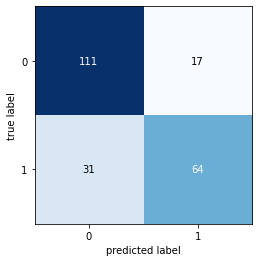

In [68]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)

In [69]:
from sklearn.metrics import f1_score

In [70]:
f1=f1_score(y_act,y_pred)

In [71]:
f1

0.7272727272727273

In [82]:
f11=2*(p*r)/(p+r)

In [83]:
f11

0.7272727272727273

In [72]:
from sklearn.metrics import precision_score

In [73]:
p=precision_score(y_act,y_pred)

In [74]:
p

0.7901234567901234

In [75]:
ss=64/(64+17)

In [76]:
ss

0.7901234567901234

In [77]:
from sklearn.metrics import recall_score

In [78]:
r=recall_score(y_act,y_pred)

In [79]:
r

0.6736842105263158

In [80]:
rr=64/(64+31)

In [81]:
rr

0.6736842105263158